In [2]:
import json
import gensim
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

ubuntu_path = '/home/arnab/Desktop/Thesis Ubuntu/'
windows_path = 'C:/Users/User/Desktop/Thesis_Windows/'

root_path = windows_path

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# with open('out.json') as f:
#     news = json.load(f)
#     print(type(news))

In [3]:
file_name = ubuntu_path + '/Dataset_preprocessed/Corpus_2.json'
with open(file_name) as f:
    news = json.load(f)
    print('loaded',file_name,' :: ' , len(news) , 'articles')

loaded /home/arnab/Desktop/Thesis Ubuntu/Dataset_preprocessed/Corpus_2.json  ::  102097 articles


In [2]:
kaler_kantho_path = root_path + 'Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_'
news = []
for i in range(1 , 7):
    file_name = kaler_kantho_path + str(i) + '.json'
    with open(file_name) as f:
        curr = json.load(f)
        news = news + curr
        print('loaded',file_name,' :: ' , len(curr) , 'articles')

print(' ====> Dataset loading completed :: ' , len(news) , 'articles')

loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_1.json  ::  49997 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_2.json  ::  49999 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_3.json  ::  50000 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_4.json  ::  50000 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_5.json  ::  50000 articles
loaded C:/Users/User/Desktop/Thesis_Windows/Dataset_preprocessed/News_Papers/Kaler_kantha_preprocessed/kaler_kantha_out_6.json  ::  28739 articles
 ====> Dataset loading completed ::  278735 articles


In [3]:
news[0]

{'body': 'পরি অধিদপ্তর নিয়োগ অনিয়ম তদন্ গঠিত তদন্ত কমি অনিয়ম হ দা পরি জলবায়ু পরিবর্তন মন্ত্রণাল সম্পর্কিত সংসদী স্থায়ী কমি কমি বৈঠ এ ক্ষোভ প্রকাশ পাশাপাশি অনিয়ম জড়িত সকল বিরুদ্ধ কার্যক ব্যবস্থা গ্রহণ সুপারিশ হ গতকাল মঙ্গল বিকাল জাতী সংসদ ভবন অনুষ্ঠিত বৈঠ সভাপতিত্ব কমি সভাপতি ড. মোহাম্মদ হাছান মাহমুদ বৈঠ কমি সদস্য মন্ত্রী ব্যারিস্ আনিসুল ইসলাম মাহমুদ উপমন্ত্রী আবদুল্লাহ আল ইসলাম জ্যাকব নবী নেওয়াজ মো. ইয়াহ্ইয়া চৌধুরী টিপু সুলতান সংশ্লিষ্ট কর্মকর্ উপস্থিত বৈঠক শাষ কমি সভাপতি হাছান মাহমুদ সাংবাদিকদ পরি অধিদপ্তর নিয়োগ অনিয়ম তদন্ গঠিত কমি অনিয়ম হ তদন্ত কমি বল অনিয়ম হয়নি চা দে নাম অর্থ দাবী প্রমাণ অর্থ দাবী হ কল রেকর্ড আরো সংসদী কমি বিষ সংশ্লিষ্টদ শুন মন্ত্রণাল কার্যক ব্যবস্থা হ কমি সূত্ জানা গত বছর ২৯ নভেম্ব পরি অধিদপ্তর ৪৯ অফ সহায়ক ১২ নিরাপত্ কর্মী ৬ পরিচ্ছন্ন কর্মী নিয়োগ পত্রিকা বিজ্ঞাপন দরপত্ আহবান পিমা অ্যাসোসিয়েটস নাম প্রতিষ্ঠান ৬৭ জনবল নিয়োগ চুক্তি চলতি বছর ৩০ জানুয়ারি সংসদী কমি বৈঠ নিয়োগ অনিয়ম অভিযোগ উত্থাপন কমি অভিযোগ পা প্রতিষ্ঠান চা দে নাম চা প্রার্থীদ অর্থ দাবী ছাড়া প্রতিষ্ঠান যথা

In [4]:
news[0]['body']

'পরি অধিদপ্তর নিয়োগ অনিয়ম তদন্ গঠিত তদন্ত কমি অনিয়ম হ দা পরি জলবায়ু পরিবর্তন মন্ত্রণাল সম্পর্কিত সংসদী স্থায়ী কমি কমি বৈঠ এ ক্ষোভ প্রকাশ পাশাপাশি অনিয়ম জড়িত সকল বিরুদ্ধ কার্যক ব্যবস্থা গ্রহণ সুপারিশ হ গতকাল মঙ্গল বিকাল জাতী সংসদ ভবন অনুষ্ঠিত বৈঠ সভাপতিত্ব কমি সভাপতি ড. মোহাম্মদ হাছান মাহমুদ বৈঠ কমি সদস্য মন্ত্রী ব্যারিস্ আনিসুল ইসলাম মাহমুদ উপমন্ত্রী আবদুল্লাহ আল ইসলাম জ্যাকব নবী নেওয়াজ মো. ইয়াহ্ইয়া চৌধুরী টিপু সুলতান সংশ্লিষ্ট কর্মকর্ উপস্থিত বৈঠক শাষ কমি সভাপতি হাছান মাহমুদ সাংবাদিকদ পরি অধিদপ্তর নিয়োগ অনিয়ম তদন্ গঠিত কমি অনিয়ম হ তদন্ত কমি বল অনিয়ম হয়নি চা দে নাম অর্থ দাবী প্রমাণ অর্থ দাবী হ কল রেকর্ড আরো সংসদী কমি বিষ সংশ্লিষ্টদ শুন মন্ত্রণাল কার্যক ব্যবস্থা হ কমি সূত্ জানা গত বছর ২৯ নভেম্ব পরি অধিদপ্তর ৪৯ অফ সহায়ক ১২ নিরাপত্ কর্মী ৬ পরিচ্ছন্ন কর্মী নিয়োগ পত্রিকা বিজ্ঞাপন দরপত্ আহবান পিমা অ্যাসোসিয়েটস নাম প্রতিষ্ঠান ৬৭ জনবল নিয়োগ চুক্তি চলতি বছর ৩০ জানুয়ারি সংসদী কমি বৈঠ নিয়োগ অনিয়ম অভিযোগ উত্থাপন কমি অভিযোগ পা প্রতিষ্ঠান চা দে নাম চা প্রার্থীদ অর্থ দাবী ছাড়া প্রতিষ্ঠান যথাযথ নিয়ম অ

In [5]:
def tokenize_a_news(news):
    return news['body'].strip().split(' ')
tokenize_a_news(news[0])

['পরি',
 'অধিদপ্তর',
 'নিয়োগ',
 'অনিয়ম',
 'তদন্',
 'গঠিত',
 'তদন্ত',
 'কমি',
 'অনিয়ম',
 'হ',
 'দা',
 'পরি',
 'জলবায়ু',
 'পরিবর্তন',
 'মন্ত্রণাল',
 'সম্পর্কিত',
 'সংসদী',
 'স্থায়ী',
 'কমি',
 'কমি',
 'বৈঠ',
 'এ',
 'ক্ষোভ',
 'প্রকাশ',
 'পাশাপাশি',
 'অনিয়ম',
 'জড়িত',
 'সকল',
 'বিরুদ্ধ',
 'কার্যক',
 'ব্যবস্থা',
 'গ্রহণ',
 'সুপারিশ',
 'হ',
 'গতকাল',
 'মঙ্গল',
 'বিকাল',
 'জাতী',
 'সংসদ',
 'ভবন',
 'অনুষ্ঠিত',
 'বৈঠ',
 'সভাপতিত্ব',
 'কমি',
 'সভাপতি',
 'ড.',
 'মোহাম্মদ',
 'হাছান',
 'মাহমুদ',
 'বৈঠ',
 'কমি',
 'সদস্য',
 'মন্ত্রী',
 'ব্যারিস্',
 'আনিসুল',
 'ইসলাম',
 'মাহমুদ',
 'উপমন্ত্রী',
 'আবদুল্লাহ',
 'আল',
 'ইসলাম',
 'জ্যাকব',
 'নবী',
 'নেওয়াজ',
 'মো.',
 'ইয়াহ্ইয়া',
 'চৌধুরী',
 'টিপু',
 'সুলতান',
 'সংশ্লিষ্ট',
 'কর্মকর্',
 'উপস্থিত',
 'বৈঠক',
 'শাষ',
 'কমি',
 'সভাপতি',
 'হাছান',
 'মাহমুদ',
 'সাংবাদিকদ',
 'পরি',
 'অধিদপ্তর',
 'নিয়োগ',
 'অনিয়ম',
 'তদন্',
 'গঠিত',
 'কমি',
 'অনিয়ম',
 'হ',
 'তদন্ত',
 'কমি',
 'বল',
 'অনিয়ম',
 'হয়নি',
 'চা',
 'দে',
 'নাম',
 'অর্থ',
 'দাবী',
 'প্রমাণ',
 'অর্থ',
 'দাবী'

In [6]:
def read_input(news):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(len(news)))
    for i in range(len(news)): 
        if (i%10000==0):
            logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
#         yield gensim.utils.simple_preprocess(news[i]['Body'])
        yield tokenize_a_news(news[i])

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input(news))
logging.info ("Done reading data file")

2018-08-19 16:20:20,912 : INFO : reading file 278735...this may take a while
2018-08-19 16:20:20,912 : INFO : read 0 reviews
2018-08-19 16:20:21,225 : INFO : read 10000 reviews
2018-08-19 16:20:21,482 : INFO : read 20000 reviews
2018-08-19 16:20:21,798 : INFO : read 30000 reviews
2018-08-19 16:20:22,349 : INFO : read 40000 reviews
2018-08-19 16:20:22,704 : INFO : read 50000 reviews
2018-08-19 16:20:23,148 : INFO : read 60000 reviews
2018-08-19 16:20:23,411 : INFO : read 70000 reviews
2018-08-19 16:20:23,707 : INFO : read 80000 reviews
2018-08-19 16:20:24,041 : INFO : read 90000 reviews
2018-08-19 16:20:24,339 : INFO : read 100000 reviews
2018-08-19 16:20:24,686 : INFO : read 110000 reviews
2018-08-19 16:20:24,996 : INFO : read 120000 reviews
2018-08-19 16:20:25,815 : INFO : read 130000 reviews
2018-08-19 16:20:26,075 : INFO : read 140000 reviews
2018-08-19 16:20:26,383 : INFO : read 150000 reviews
2018-08-19 16:20:26,773 : INFO : read 160000 reviews
2018-08-19 16:20:27,068 : INFO : rea

In [7]:
print(len(news) , len(documents))

278735 278735


In [8]:
model = gensim.models.Word2Vec (documents, size=10, window=20, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=20)

2018-08-19 16:20:37,299 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-08-19 16:20:37,299 : INFO : collecting all words and their counts
2018-08-19 16:20:37,314 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-19 16:20:37,668 : INFO : PROGRESS: at sentence #10000, processed 1201401 words, keeping 60662 word types
2018-08-19 16:20:38,016 : INFO : PROGRESS: at sentence #20000, processed 2493824 words, keeping 97180 word types
2018-08-19 16:20:38,448 : INFO : PROGRESS: at sentence #30000, processed 4151752 words, keeping 127346 word types
2018-08-19 16:20:38,853 : INFO : PROGRESS: at sentence #40000, processed 5695019 words, keeping 150089 word types
2018-08-19 16:20:39,278 : INFO : PROGRESS: at sentence #50000, processed 7210101 words, keeping 168183 word types
2018-08-19 16:20:39,842 : INFO : PROGRESS: at sentence #60000, processed 8993941 words, keeping 208175 word types
2018-08-19 16:20:40,258 : INFO : PROGRESS

2018-08-19 16:21:35,118 : INFO : EPOCH 1 - PROGRESS: at 52.98% examples, 584950 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:21:36,174 : INFO : EPOCH 1 - PROGRESS: at 54.18% examples, 585243 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:21:37,184 : INFO : EPOCH 1 - PROGRESS: at 55.47% examples, 585855 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:21:38,228 : INFO : EPOCH 1 - PROGRESS: at 56.72% examples, 585599 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:21:39,257 : INFO : EPOCH 1 - PROGRESS: at 58.15% examples, 585794 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:21:40,253 : INFO : EPOCH 1 - PROGRESS: at 59.45% examples, 586311 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:21:41,265 : INFO : EPOCH 1 - PROGRESS: at 60.93% examples, 586919 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:21:42,270 : INFO : EPOCH 1 - PROGRESS: at 62.54% examples, 587130 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:21:43,277 : INFO : EPOCH 1 - PROGRESS: at 64.09% examples, 586885 words/s,

2018-08-19 16:22:40,337 : INFO : EPOCH 2 - PROGRESS: at 48.06% examples, 597316 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:41,351 : INFO : EPOCH 2 - PROGRESS: at 49.97% examples, 598342 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:22:42,387 : INFO : EPOCH 2 - PROGRESS: at 52.14% examples, 600360 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:43,408 : INFO : EPOCH 2 - PROGRESS: at 53.76% examples, 602823 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:44,433 : INFO : EPOCH 2 - PROGRESS: at 55.20% examples, 604586 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:45,453 : INFO : EPOCH 2 - PROGRESS: at 56.53% examples, 605488 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:46,493 : INFO : EPOCH 2 - PROGRESS: at 58.21% examples, 607957 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:47,519 : INFO : EPOCH 2 - PROGRESS: at 59.66% examples, 609475 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:22:48,523 : INFO : EPOCH 2 - PROGRESS: at 61.47% examples, 611999 words/s,

2018-08-19 16:23:45,344 : INFO : EPOCH 3 - PROGRESS: at 53.90% examples, 661509 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:23:46,389 : INFO : EPOCH 3 - PROGRESS: at 55.27% examples, 660529 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:23:47,405 : INFO : EPOCH 3 - PROGRESS: at 56.72% examples, 661037 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:23:48,437 : INFO : EPOCH 3 - PROGRESS: at 58.30% examples, 661003 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:23:49,496 : INFO : EPOCH 3 - PROGRESS: at 59.75% examples, 660550 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:23:50,508 : INFO : EPOCH 3 - PROGRESS: at 61.47% examples, 660738 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:23:51,525 : INFO : EPOCH 3 - PROGRESS: at 63.37% examples, 661537 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:23:52,529 : INFO : EPOCH 3 - PROGRESS: at 65.13% examples, 660903 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:23:53,545 : INFO : EPOCH 3 - PROGRESS: at 66.95% examples, 661123 words/s,

2018-08-19 16:24:50,807 : INFO : EPOCH 4 - PROGRESS: at 53.19% examples, 592014 words/s, in_qsize 17, out_qsize 2
2018-08-19 16:24:51,831 : INFO : EPOCH 4 - PROGRESS: at 54.27% examples, 590020 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:24:52,855 : INFO : EPOCH 4 - PROGRESS: at 55.57% examples, 590853 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:24:53,852 : INFO : EPOCH 4 - PROGRESS: at 56.77% examples, 590057 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:24:54,898 : INFO : EPOCH 4 - PROGRESS: at 58.21% examples, 590126 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:24:55,915 : INFO : EPOCH 4 - PROGRESS: at 59.60% examples, 591540 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:24:56,937 : INFO : EPOCH 4 - PROGRESS: at 61.08% examples, 591369 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:24:57,984 : INFO : EPOCH 4 - PROGRESS: at 62.79% examples, 591780 words/s, in_qsize 17, out_qsize 2
2018-08-19 16:24:59,037 : INFO : EPOCH 4 - PROGRESS: at 64.44% examples, 591519 words/s,

2018-08-19 16:25:55,986 : INFO : EPOCH 5 - PROGRESS: at 51.96% examples, 630993 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:25:57,011 : INFO : EPOCH 5 - PROGRESS: at 53.61% examples, 632385 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:25:58,057 : INFO : EPOCH 5 - PROGRESS: at 55.11% examples, 633527 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:25:59,081 : INFO : EPOCH 5 - PROGRESS: at 56.53% examples, 634990 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:26:00,085 : INFO : EPOCH 5 - PROGRESS: at 58.11% examples, 636104 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:26:01,130 : INFO : EPOCH 5 - PROGRESS: at 59.47% examples, 635318 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:26:02,137 : INFO : EPOCH 5 - PROGRESS: at 60.96% examples, 634762 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:26:03,202 : INFO : EPOCH 5 - PROGRESS: at 62.69% examples, 634019 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:26:04,214 : INFO : EPOCH 5 - PROGRESS: at 64.44% examples, 634277 words/s,

2018-08-19 16:26:57,624 : INFO : EPOCH 1 - PROGRESS: at 53.12% examples, 665150 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:26:58,668 : INFO : EPOCH 1 - PROGRESS: at 54.46% examples, 664852 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:26:59,664 : INFO : EPOCH 1 - PROGRESS: at 55.86% examples, 665284 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:27:00,675 : INFO : EPOCH 1 - PROGRESS: at 57.23% examples, 663805 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:27:01,690 : INFO : EPOCH 1 - PROGRESS: at 58.76% examples, 663471 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:27:02,695 : INFO : EPOCH 1 - PROGRESS: at 60.04% examples, 661906 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:27:03,699 : INFO : EPOCH 1 - PROGRESS: at 61.67% examples, 661030 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:27:04,726 : INFO : EPOCH 1 - PROGRESS: at 63.14% examples, 657666 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:27:05,751 : INFO : EPOCH 1 - PROGRESS: at 64.81% examples, 655931 words/s,

2018-08-19 16:28:03,274 : INFO : EPOCH 2 - PROGRESS: at 46.29% examples, 589068 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:28:04,327 : INFO : EPOCH 2 - PROGRESS: at 48.06% examples, 589361 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:28:05,333 : INFO : EPOCH 2 - PROGRESS: at 49.77% examples, 588715 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:28:06,347 : INFO : EPOCH 2 - PROGRESS: at 51.67% examples, 588826 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:28:07,392 : INFO : EPOCH 2 - PROGRESS: at 53.20% examples, 587549 words/s, in_qsize 20, out_qsize 8
2018-08-19 16:28:08,495 : INFO : EPOCH 2 - PROGRESS: at 54.61% examples, 588601 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:28:09,519 : INFO : EPOCH 2 - PROGRESS: at 55.87% examples, 589158 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:28:10,596 : INFO : EPOCH 2 - PROGRESS: at 57.19% examples, 588075 words/s, in_qsize 20, out_qsize 5
2018-08-19 16:28:11,610 : INFO : EPOCH 2 - PROGRESS: at 58.74% examples, 589821 words/s,

2018-08-19 16:29:08,654 : INFO : EPOCH 3 - PROGRESS: at 46.44% examples, 644017 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:29:09,679 : INFO : EPOCH 3 - PROGRESS: at 48.48% examples, 645292 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:29:10,774 : INFO : EPOCH 3 - PROGRESS: at 50.62% examples, 645042 words/s, in_qsize 20, out_qsize 8
2018-08-19 16:29:11,848 : INFO : EPOCH 3 - PROGRESS: at 52.93% examples, 646362 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:29:12,883 : INFO : EPOCH 3 - PROGRESS: at 54.33% examples, 647958 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:29:13,905 : INFO : EPOCH 3 - PROGRESS: at 55.76% examples, 648793 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:29:14,914 : INFO : EPOCH 3 - PROGRESS: at 57.26% examples, 649401 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:29:15,988 : INFO : EPOCH 3 - PROGRESS: at 58.71% examples, 647695 words/s, in_qsize 20, out_qsize 6
2018-08-19 16:29:17,013 : INFO : EPOCH 3 - PROGRESS: at 60.45% examples, 651016 words/s,

2018-08-19 16:30:13,918 : INFO : EPOCH 4 - PROGRESS: at 53.16% examples, 631583 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:30:14,922 : INFO : EPOCH 4 - PROGRESS: at 54.27% examples, 629743 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:30:15,927 : INFO : EPOCH 4 - PROGRESS: at 55.48% examples, 628447 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:30:16,931 : INFO : EPOCH 4 - PROGRESS: at 56.70% examples, 627055 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:30:17,955 : INFO : EPOCH 4 - PROGRESS: at 58.21% examples, 627200 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:30:18,961 : INFO : EPOCH 4 - PROGRESS: at 59.47% examples, 626106 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:30:20,016 : INFO : EPOCH 4 - PROGRESS: at 60.94% examples, 624701 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:30:21,074 : INFO : EPOCH 4 - PROGRESS: at 62.69% examples, 624691 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:30:22,080 : INFO : EPOCH 4 - PROGRESS: at 64.31% examples, 624015 words/s,

2018-08-19 16:31:18,583 : INFO : EPOCH 5 - PROGRESS: at 46.50% examples, 580415 words/s, in_qsize 20, out_qsize 4
2018-08-19 16:31:19,648 : INFO : EPOCH 5 - PROGRESS: at 48.48% examples, 582024 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:31:20,650 : INFO : EPOCH 5 - PROGRESS: at 50.30% examples, 582524 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:31:21,649 : INFO : EPOCH 5 - PROGRESS: at 52.19% examples, 582956 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:31:22,695 : INFO : EPOCH 5 - PROGRESS: at 53.63% examples, 583442 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:31:23,689 : INFO : EPOCH 5 - PROGRESS: at 54.89% examples, 583337 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:31:24,704 : INFO : EPOCH 5 - PROGRESS: at 56.03% examples, 583028 words/s, in_qsize 14, out_qsize 5
2018-08-19 16:31:25,738 : INFO : EPOCH 5 - PROGRESS: at 57.47% examples, 583728 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:31:26,746 : INFO : EPOCH 5 - PROGRESS: at 58.87% examples, 584278 words/s,

2018-08-19 16:32:23,177 : INFO : EPOCH 6 - PROGRESS: at 49.01% examples, 648066 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:32:24,191 : INFO : EPOCH 6 - PROGRESS: at 50.90% examples, 646597 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:32:25,266 : INFO : EPOCH 6 - PROGRESS: at 53.04% examples, 647008 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:32:26,291 : INFO : EPOCH 6 - PROGRESS: at 54.35% examples, 647363 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:32:27,295 : INFO : EPOCH 6 - PROGRESS: at 55.67% examples, 647208 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:32:28,300 : INFO : EPOCH 6 - PROGRESS: at 57.19% examples, 648248 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:32:29,331 : INFO : EPOCH 6 - PROGRESS: at 58.83% examples, 649269 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:32:30,342 : INFO : EPOCH 6 - PROGRESS: at 60.11% examples, 648018 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:32:31,354 : INFO : EPOCH 6 - PROGRESS: at 61.97% examples, 649642 words/s,

2018-08-19 16:33:29,019 : INFO : EPOCH 7 - PROGRESS: at 53.20% examples, 605758 words/s, in_qsize 15, out_qsize 4
2018-08-19 16:33:30,023 : INFO : EPOCH 7 - PROGRESS: at 54.43% examples, 605617 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:33:31,058 : INFO : EPOCH 7 - PROGRESS: at 55.72% examples, 605666 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:33:32,114 : INFO : EPOCH 7 - PROGRESS: at 56.96% examples, 603876 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:33:33,182 : INFO : EPOCH 7 - PROGRESS: at 58.44% examples, 603715 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:33:34,206 : INFO : EPOCH 7 - PROGRESS: at 59.75% examples, 603951 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:33:35,221 : INFO : EPOCH 7 - PROGRESS: at 61.31% examples, 603975 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:33:36,235 : INFO : EPOCH 7 - PROGRESS: at 62.92% examples, 603676 words/s, in_qsize 16, out_qsize 3
2018-08-19 16:33:37,249 : INFO : EPOCH 7 - PROGRESS: at 64.67% examples, 604277 words/s,

2018-08-19 16:34:34,490 : INFO : EPOCH 8 - PROGRESS: at 48.88% examples, 589090 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:34:35,534 : INFO : EPOCH 8 - PROGRESS: at 50.74% examples, 588646 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:34:36,547 : INFO : EPOCH 8 - PROGRESS: at 52.45% examples, 587739 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:34:37,552 : INFO : EPOCH 8 - PROGRESS: at 53.95% examples, 590370 words/s, in_qsize 17, out_qsize 2
2018-08-19 16:34:38,568 : INFO : EPOCH 8 - PROGRESS: at 55.39% examples, 592627 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:34:39,653 : INFO : EPOCH 8 - PROGRESS: at 56.82% examples, 593343 words/s, in_qsize 13, out_qsize 6
2018-08-19 16:34:40,658 : INFO : EPOCH 8 - PROGRESS: at 58.53% examples, 596904 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:34:41,664 : INFO : EPOCH 8 - PROGRESS: at 59.92% examples, 598193 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:34:42,678 : INFO : EPOCH 8 - PROGRESS: at 61.64% examples, 599881 words/s,

2018-08-19 16:35:39,477 : INFO : EPOCH 9 - PROGRESS: at 55.54% examples, 665973 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:35:40,473 : INFO : EPOCH 9 - PROGRESS: at 56.91% examples, 665139 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:35:41,618 : INFO : EPOCH 9 - PROGRESS: at 58.65% examples, 664696 words/s, in_qsize 13, out_qsize 6
2018-08-19 16:35:42,635 : INFO : EPOCH 9 - PROGRESS: at 60.23% examples, 666212 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:35:43,642 : INFO : EPOCH 9 - PROGRESS: at 62.05% examples, 667153 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:35:44,676 : INFO : EPOCH 9 - PROGRESS: at 63.87% examples, 666518 words/s, in_qsize 12, out_qsize 7
2018-08-19 16:35:45,690 : INFO : EPOCH 9 - PROGRESS: at 65.86% examples, 668019 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:35:46,705 : INFO : EPOCH 9 - PROGRESS: at 67.67% examples, 667887 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:35:47,759 : INFO : EPOCH 9 - PROGRESS: at 69.55% examples, 667632 words/s,

2018-08-19 16:36:45,034 : INFO : EPOCH 10 - PROGRESS: at 56.33% examples, 594136 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:36:46,037 : INFO : EPOCH 10 - PROGRESS: at 57.78% examples, 594821 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:36:47,041 : INFO : EPOCH 10 - PROGRESS: at 59.22% examples, 595834 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:36:48,069 : INFO : EPOCH 10 - PROGRESS: at 60.42% examples, 594283 words/s, in_qsize 13, out_qsize 6
2018-08-19 16:36:49,082 : INFO : EPOCH 10 - PROGRESS: at 62.11% examples, 595445 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:36:50,141 : INFO : EPOCH 10 - PROGRESS: at 63.81% examples, 595349 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:36:51,224 : INFO : EPOCH 10 - PROGRESS: at 65.60% examples, 595644 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:36:52,260 : INFO : EPOCH 10 - PROGRESS: at 67.28% examples, 595789 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:36:53,325 : INFO : EPOCH 10 - PROGRESS: at 68.92% examples, 595156

2018-08-19 16:37:50,258 : INFO : EPOCH 11 - PROGRESS: at 55.60% examples, 625211 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:37:51,273 : INFO : EPOCH 11 - PROGRESS: at 57.05% examples, 626156 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:37:52,315 : INFO : EPOCH 11 - PROGRESS: at 58.67% examples, 627406 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:37:53,341 : INFO : EPOCH 11 - PROGRESS: at 60.15% examples, 628607 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:37:54,346 : INFO : EPOCH 11 - PROGRESS: at 62.08% examples, 631457 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:37:55,378 : INFO : EPOCH 11 - PROGRESS: at 63.91% examples, 632091 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:37:56,389 : INFO : EPOCH 11 - PROGRESS: at 65.78% examples, 633148 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:37:57,395 : INFO : EPOCH 11 - PROGRESS: at 67.59% examples, 633998 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:37:58,399 : INFO : EPOCH 11 - PROGRESS: at 69.39% examples, 634595

2018-08-19 16:38:55,321 : INFO : EPOCH 12 - PROGRESS: at 62.34% examples, 667577 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:38:56,335 : INFO : EPOCH 12 - PROGRESS: at 64.25% examples, 668362 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:38:57,409 : INFO : EPOCH 12 - PROGRESS: at 66.18% examples, 668162 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:38:58,414 : INFO : EPOCH 12 - PROGRESS: at 67.97% examples, 667955 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:38:59,439 : INFO : EPOCH 12 - PROGRESS: at 69.93% examples, 668722 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:39:00,440 : INFO : EPOCH 12 - PROGRESS: at 71.76% examples, 668175 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:39:01,468 : INFO : EPOCH 12 - PROGRESS: at 73.50% examples, 666388 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:39:02,479 : INFO : EPOCH 12 - PROGRESS: at 75.09% examples, 664288 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:39:03,505 : INFO : EPOCH 12 - PROGRESS: at 76.97% examples, 663330

2018-08-19 16:40:00,622 : INFO : EPOCH 13 - PROGRESS: at 60.16% examples, 596355 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:01,618 : INFO : EPOCH 13 - PROGRESS: at 61.74% examples, 596837 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:02,633 : INFO : EPOCH 13 - PROGRESS: at 63.48% examples, 597673 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:03,637 : INFO : EPOCH 13 - PROGRESS: at 64.95% examples, 596047 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:04,652 : INFO : EPOCH 13 - PROGRESS: at 66.53% examples, 595866 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:05,656 : INFO : EPOCH 13 - PROGRESS: at 67.97% examples, 594597 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:06,711 : INFO : EPOCH 13 - PROGRESS: at 69.58% examples, 593750 words/s, in_qsize 18, out_qsize 4
2018-08-19 16:40:07,728 : INFO : EPOCH 13 - PROGRESS: at 71.40% examples, 594631 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:40:08,756 : INFO : EPOCH 13 - PROGRESS: at 73.11% examples, 594329

2018-08-19 16:41:05,403 : INFO : EPOCH 14 - PROGRESS: at 59.75% examples, 639652 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:41:06,410 : INFO : EPOCH 14 - PROGRESS: at 61.52% examples, 640939 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:41:07,444 : INFO : EPOCH 14 - PROGRESS: at 63.35% examples, 641259 words/s, in_qsize 17, out_qsize 2
2018-08-19 16:41:08,471 : INFO : EPOCH 14 - PROGRESS: at 65.21% examples, 641636 words/s, in_qsize 17, out_qsize 2
2018-08-19 16:41:09,496 : INFO : EPOCH 14 - PROGRESS: at 67.03% examples, 642280 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:41:10,530 : INFO : EPOCH 14 - PROGRESS: at 68.98% examples, 643682 words/s, in_qsize 17, out_qsize 2
2018-08-19 16:41:11,534 : INFO : EPOCH 14 - PROGRESS: at 70.78% examples, 643682 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:41:12,567 : INFO : EPOCH 14 - PROGRESS: at 72.72% examples, 644069 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:41:13,572 : INFO : EPOCH 14 - PROGRESS: at 74.68% examples, 645366

2018-08-19 16:42:11,006 : INFO : EPOCH 15 - PROGRESS: at 67.59% examples, 650492 words/s, in_qsize 15, out_qsize 4
2018-08-19 16:42:12,041 : INFO : EPOCH 15 - PROGRESS: at 69.47% examples, 650980 words/s, in_qsize 20, out_qsize 1
2018-08-19 16:42:13,047 : INFO : EPOCH 15 - PROGRESS: at 71.17% examples, 649757 words/s, in_qsize 20, out_qsize 1
2018-08-19 16:42:14,044 : INFO : EPOCH 15 - PROGRESS: at 72.89% examples, 648758 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:42:15,057 : INFO : EPOCH 15 - PROGRESS: at 74.53% examples, 647435 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:42:16,103 : INFO : EPOCH 15 - PROGRESS: at 76.40% examples, 646737 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:42:17,148 : INFO : EPOCH 15 - PROGRESS: at 78.14% examples, 645436 words/s, in_qsize 20, out_qsize 5
2018-08-19 16:42:18,174 : INFO : EPOCH 15 - PROGRESS: at 79.55% examples, 644968 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:42:19,204 : INFO : EPOCH 15 - PROGRESS: at 81.06% examples, 644452

2018-08-19 16:43:15,739 : INFO : EPOCH 16 - PROGRESS: at 62.77% examples, 592147 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:43:16,761 : INFO : EPOCH 16 - PROGRESS: at 64.42% examples, 592339 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:43:17,808 : INFO : EPOCH 16 - PROGRESS: at 66.06% examples, 592019 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:43:18,812 : INFO : EPOCH 16 - PROGRESS: at 67.72% examples, 592416 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:43:19,836 : INFO : EPOCH 16 - PROGRESS: at 69.37% examples, 592408 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:43:20,861 : INFO : EPOCH 16 - PROGRESS: at 71.19% examples, 593272 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:43:21,915 : INFO : EPOCH 16 - PROGRESS: at 72.95% examples, 593110 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:43:22,919 : INFO : EPOCH 16 - PROGRESS: at 74.66% examples, 593621 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:43:23,934 : INFO : EPOCH 16 - PROGRESS: at 76.42% examples, 593721

2018-08-19 16:44:20,751 : INFO : EPOCH 17 - PROGRESS: at 66.11% examples, 653989 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:44:21,769 : INFO : EPOCH 17 - PROGRESS: at 68.05% examples, 655204 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:44:22,813 : INFO : EPOCH 17 - PROGRESS: at 69.96% examples, 655550 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:44:23,832 : INFO : EPOCH 17 - PROGRESS: at 71.88% examples, 655660 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:44:24,844 : INFO : EPOCH 17 - PROGRESS: at 73.60% examples, 654604 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:44:25,899 : INFO : EPOCH 17 - PROGRESS: at 75.46% examples, 654149 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:44:26,908 : INFO : EPOCH 17 - PROGRESS: at 77.48% examples, 654687 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:44:27,905 : INFO : EPOCH 17 - PROGRESS: at 79.06% examples, 654672 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:44:28,912 : INFO : EPOCH 17 - PROGRESS: at 80.69% examples, 655629

2018-08-19 16:45:26,315 : INFO : EPOCH 18 - PROGRESS: at 70.78% examples, 628776 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:45:27,337 : INFO : EPOCH 18 - PROGRESS: at 72.52% examples, 628233 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:45:28,373 : INFO : EPOCH 18 - PROGRESS: at 74.36% examples, 628446 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:45:29,378 : INFO : EPOCH 18 - PROGRESS: at 75.96% examples, 626891 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:45:30,401 : INFO : EPOCH 18 - PROGRESS: at 77.77% examples, 626615 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:45:31,455 : INFO : EPOCH 18 - PROGRESS: at 79.27% examples, 626304 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:45:32,461 : INFO : EPOCH 18 - PROGRESS: at 80.69% examples, 625856 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:45:33,498 : INFO : EPOCH 18 - PROGRESS: at 82.20% examples, 625457 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:45:34,542 : INFO : EPOCH 18 - PROGRESS: at 83.66% examples, 625402

2018-08-19 16:46:31,306 : INFO : EPOCH 19 - PROGRESS: at 65.38% examples, 583388 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:46:32,328 : INFO : EPOCH 19 - PROGRESS: at 66.90% examples, 582761 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:46:33,353 : INFO : EPOCH 19 - PROGRESS: at 68.68% examples, 584213 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:46:34,381 : INFO : EPOCH 19 - PROGRESS: at 70.53% examples, 585537 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:46:35,403 : INFO : EPOCH 19 - PROGRESS: at 72.55% examples, 587835 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:46:36,399 : INFO : EPOCH 19 - PROGRESS: at 74.29% examples, 588501 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:46:37,421 : INFO : EPOCH 19 - PROGRESS: at 75.96% examples, 588287 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:46:38,417 : INFO : EPOCH 19 - PROGRESS: at 77.80% examples, 589169 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:46:39,420 : INFO : EPOCH 19 - PROGRESS: at 79.38% examples, 590926

2018-08-19 16:47:36,178 : INFO : EPOCH 20 - PROGRESS: at 71.54% examples, 655002 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:47:37,192 : INFO : EPOCH 20 - PROGRESS: at 73.37% examples, 654555 words/s, in_qsize 20, out_qsize 0
2018-08-19 16:47:38,226 : INFO : EPOCH 20 - PROGRESS: at 75.27% examples, 654903 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:47:39,240 : INFO : EPOCH 20 - PROGRESS: at 77.25% examples, 654904 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:47:40,294 : INFO : EPOCH 20 - PROGRESS: at 78.93% examples, 654711 words/s, in_qsize 14, out_qsize 5
2018-08-19 16:47:41,328 : INFO : EPOCH 20 - PROGRESS: at 80.67% examples, 656256 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:47:42,373 : INFO : EPOCH 20 - PROGRESS: at 82.28% examples, 656100 words/s, in_qsize 19, out_qsize 0
2018-08-19 16:47:43,388 : INFO : EPOCH 20 - PROGRESS: at 83.95% examples, 657682 words/s, in_qsize 18, out_qsize 1
2018-08-19 16:47:44,432 : INFO : EPOCH 20 - PROGRESS: at 85.43% examples, 656832

(804993354, 825222120)

In [9]:
w1 = "খবর"
model.wv.most_similar(positive=w1 , )

2018-08-19 16:48:11,074 : INFO : precomputing L2-norms of word weight vectors


[('সংবাদমাধ্যম', 0.9692183136940002),
 ('নিরাপত্তাবেস্টনি', 0.9498244524002075),
 ('সংবাদমাধ\u200c্যম', 0.9405738711357117),
 ('ইছাদ', 0.9375192523002625),
 ('উল্লেখ্', 0.9306818842887878),
 ('রেস্টহাউ', 0.9219269156455994),
 ('ট্যারেনটিনো', 0.9177270531654358),
 ('বান্দ্রাকুর্লা', 0.9158026576042175),
 ('মিকা', 0.9142104983329773),
 ('ম্যারী', 0.9127546548843384)]

In [10]:
words = model.wv.index2word

In [11]:
len(words)

311051

In [12]:
print("Saving model")
path = root_path + 'W2V_D2V_models/model_2/kaler_kantha_W2V_10.model'
model.save(path)
print("model saved")

2018-08-19 16:48:22,367 : INFO : saving Word2Vec object under C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/kaler_kantha_W2V_10.model, separately None
2018-08-19 16:48:22,379 : INFO : not storing attribute vectors_norm
2018-08-19 16:48:22,379 : INFO : not storing attribute cum_table


Saving model


2018-08-19 16:48:25,254 : INFO : saved C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/model_2/kaler_kantha_W2V_10.model


model saved


# After loading model

In [9]:
path = root_path + 'W2V_D2V_models/corpus_W2V.model'
model = gensim.models.Word2Vec.load(path)
print("model loaded successfully")

2018-09-07 01:54:09,654 : INFO : loading Word2Vec object from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/corpus_W2V.model
2018-09-07 01:54:11,149 : INFO : loading wv recursively from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/corpus_W2V.model.wv.* with mmap=None
2018-09-07 01:54:11,151 : INFO : loading vectors from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/corpus_W2V.model.wv.vectors.npy with mmap=None
2018-09-07 01:54:12,691 : INFO : setting ignored attribute vectors_norm to None
2018-09-07 01:54:12,693 : INFO : loading vocabulary recursively from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/corpus_W2V.model.vocabulary.* with mmap=None
2018-09-07 01:54:12,695 : INFO : loading trainables recursively from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/corpus_W2V.model.trainables.* with mmap=None
2018-09-07 01:54:12,697 : INFO : loading syn1neg from C:/Users/User/Desktop/Thesis_Windows/W2V_D2V_models/corpus_W2V.model.trainables.syn1neg.npy with mma

model loaded successfully


In [11]:
w1 = "খবর"
model.wv.most_similar(positive=w1 , topn=5)

[('দুসংবাদ', 0.5007761120796204),
 ('খবরাখবর', 0.4752435088157654),
 ('প্রতিবেদন', 0.45567217469215393),
 ('গুজব', 0.4455074071884155),
 ('বরা', 0.4429260790348053)]

In [12]:
model.wv.most_similar(positive=['ছাত্র', 'নেতা'], negative=['ছাত্রী'], topn=10)

[('নেত', 0.6300340294837952),
 ('নেতাকর্মী', 0.5516590476036072),
 ('ডটকমএসএমএমএসবি২৩৪০', 0.5468929409980774),
 ('নেতৃবৃন্দ', 0.5279808640480042),
 ('নেতাসহ', 0.5133640170097351),
 ('সভাপতি', 0.5110645890235901),
 ('কর্মী', 0.5099533796310425),
 ('নেত্রী', 0.5081502795219421),
 ('বামপন্থী', 0.506689727306366),
 ('ছাত্রনেতা', 0.4965267777442932)]

In [14]:
model.wv.most_similar(positive=['পুরুষ', 'নেতা'], negative=['মহিলা'], topn=5)

[('নেত', 0.6013964414596558),
 ('নেত্রী', 0.4613112509250641),
 ('মতাদর্শ', 0.449344664812088),
 ('নেত্রীর', 0.44317686557769775),
 ('রাজনীতিক', 0.44301044940948486)]

In [15]:
vector = model.wv[w1]

In [16]:
print(len(vector))

150


In [18]:
w = 'নেতাকর্মী'
# w = 'lala'
if(w not in model.wv.vocab):
    print("Key not found")
else:
    print(model.wv[w])

[  1.28831458  19.65668297  11.90236282  10.29107475   7.82100058
   9.22894859  -4.69274378  -5.52382135  -9.35081959   6.40212679]


# Merge with TFIDF

In [19]:
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
import numpy as np
import itertools
import copy

import math

In [20]:
path = root_path + '/Dataset_preprocessed/News_Papers/motikontho_out_2.json'
with open(path) as f:
    fake_news = json.load(f)

In [21]:
print(type(fake_news) , len(fake_news))
print(fake_news[0])

<class 'list'> 1480
{'body': '৫ নম্ব নারী শিশু নির্যাতন দমন ট্রাইবুনাল আদাল মহিলা বিচারক তানজি ইসমাঈল গৃহকর্মী নির্যাতন মামলা ক্রিকে শাহাদত হোস স্ত্রী জেসমিন জাহান কুনো দুষ খু পা বেকসু খালাস দিয় কার্য চলা কাল শাহাদত নিচ ছ দেখাল গা হাত তু আল্লাহ কসম শুন জাতী দল খেলা ফাষ্ট বোলা আম বাসা আ চুক্তি হ বাসা বোলিং পেক সম হেলপ তার বেটসম বানান যা বেটসগার্ল এক তার বোলিং সম বাউন্সা দিছিলাম মতন খ বল গিয়া লাগ চুখ পাশ মাননী আদালত আপন হেলমেট পই বেটিং নাম সেই দুষ আপন বোলার বল বেটসমান গা লাগা কারন মামলা হই ইতিহাস দুনিয়া কুথা ইতি পুর্ব স্ত্রী মারধ যৌতু মামলায় কারাগার কণ্ঠশিল্পী আরফিন রুমি জামিন রা মহিলা বিচারক তানজি ইসমাঈল ফরিয়াদি পক্ষ পশ্ন আসামী পক্ষ বলত এক কথা আপনা দা করত শিশু মেয়ে মা হই গা গাত তোলা হই আপনাদ দা স কুনো ভিডু আছে… কথা শেষ মামলা ডিশম শিশু নির্যাতন মামলা মহিলা বিচারপতি রা বেকসু খালাস পা শাহাদত মা আপ পছন্দ প্রশ্ন উত্তর বল জানি না…হা হা হা সবচা বড় কথা স্মার্টনেস অন স্মার্টনেস জান মান পোশাকআশাক চালচলন হাইট ইম্পর্টেন্ট স্মার্টনেস হাইট লম্ দেখব সম গুজা কুঁজো হ হাঁট স্মার্ট হ দরকা ও আছে… প্লেয় স 

In [41]:
path = root_path + '/Dataset_preprocessed/News_Papers/real_news.json'
with open(path) as f:
    real_news = json.load(f)

In [42]:
print(type(real_news) , len(real_news))
print(real_news[0])

<class 'list'> 1480
{'body': 'ইসরায়ে সেনা গাল চড় মার ফিলিস্তিন প্রতিবাদ প্রতীক হ ওঠা কারাগা ছাড়া পেয় আট মাস রোব কারাগা এক মুক্তি পান আহেদ মা এএফপি খবর তথ্য ১৭ বছর আহেদ মা সকাল ইসরায়াল শ্যারন কারাগা গাড়ি পশ্চিম তীর সীমান্তবর্তী তল্লাশি চৌকি পৌঁ আহাদ বাড়ি পশ্চিম তীর নবী সালেহ গ্রাম কারাগার মুখপাত্ আসাফ লিবরাতি ইসরায়ে সেনাদ হস্তান্ত স্বাগত জানা পরিবার সদস্য সমর্থক তল্লাশিচৌকি জড়ো হ বহনকারী সেনাবাহিনী গাড়ি দাঁড়ি পশ্চিম তীর যা সেনাদ মুক্তি পা রাস্ পাশ জড়ো হ হাজারো জন সাংবাদিকদ উদ্দাশ আহেদ সংবাদ সম্মেলন কথা আহাদ বা বাসেম এক হাত দি মা হা স্ত্রী রাখ পথ হাঁট চারপাশ স্বাধীন বাঁচ চা স্লোগান ওঠ ইসরায়ে কর্তৃপক্ষ গণমাধ্যম এড়ি এমন মামা তল্লাশি চৌ দি আ ধরন তথ্য দি প্রথম হ আহেদ মা পশ্চিম তীর ফিলিস্ শহ তুল্করাম শহর কা তল্লাশি চৌ দি আ তল্লাশি চৌ দি আ তিন তিন পরিবর্তন গত বছর শেষ মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প জেরুজালেম ইসরায়াল রাজধানী স্বীকৃতি দিল ক্ষোভ ফাট পড় ফিলিস্ মানুষ পবিত্ ভূমি জেরুজালেম রাজধানী হিসাব চা ফিলিস্তিনিদ প্রতিবাদ প্রতিবাদ থামা ইসরায়াল দমনপীড়ন মিলি সংঘা দাবানল ছড়ি পড় মধ্যপ্রাচ্য অঞ্চ

In [43]:
def tokenize_a_news(news):
    return news['body'].strip().split(' ')

In [44]:
tokenize_a_news(fake_news[0])

['৫',
 'নম্ব',
 'নারী',
 'শিশু',
 'নির্যাতন',
 'দমন',
 'ট্রাইবুনাল',
 'আদাল',
 'মহিলা',
 'বিচারক',
 'তানজি',
 'ইসমাঈল',
 'গৃহকর্মী',
 'নির্যাতন',
 'মামলা',
 'ক্রিকে',
 'শাহাদত',
 'হোস',
 'স্ত্রী',
 'জেসমিন',
 'জাহান',
 'কুনো',
 'দুষ',
 'খু',
 'পা',
 'বেকসু',
 'খালাস',
 'দিয়',
 'কার্য',
 'চলা',
 'কাল',
 'শাহাদত',
 'নিচ',
 'ছ',
 'দেখাল',
 'গা',
 'হাত',
 'তু',
 'আল্লাহ',
 'কসম',
 'শুন',
 'জাতী',
 'দল',
 'খেলা',
 'ফাষ্ট',
 'বোলা',
 'আম',
 'বাসা',
 'আ',
 'চুক্তি',
 'হ',
 'বাসা',
 'বোলিং',
 'পেক',
 'সম',
 'হেলপ',
 'তার',
 'বেটসম',
 'বানান',
 'যা',
 'বেটসগার্ল',
 'এক',
 'তার',
 'বোলিং',
 'সম',
 'বাউন্সা',
 'দিছিলাম',
 'মতন',
 'খ',
 'বল',
 'গিয়া',
 'লাগ',
 'চুখ',
 'পাশ',
 'মাননী',
 'আদালত',
 'আপন',
 'হেলমেট',
 'পই',
 'বেটিং',
 'নাম',
 'সেই',
 'দুষ',
 'আপন',
 'বোলার',
 'বল',
 'বেটসমান',
 'গা',
 'লাগা',
 'কারন',
 'মামলা',
 'হই',
 'ইতিহাস',
 'দুনিয়া',
 'কুথা',
 'ইতি',
 'পুর্ব',
 'স্ত্রী',
 'মারধ',
 'যৌতু',
 'মামলায়',
 'কারাগার',
 'কণ্ঠশিল্পী',
 'আরফিন',
 'রুমি',
 'জামিন',
 'রা',
 'মহিলা',
 'বিচা

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with little normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [46]:
news_arr = []
verdict = []
for news in fake_news:
    token = tokenize_a_news(news)
    if(len(token) < 10):
        continue
    news_arr.append(news['body'])
    verdict.append('FAKE')
    
for news in real_news:
    token = tokenize_a_news(news)
    if(len(token) < 10):
        continue
    news_arr.append(news['body'])
    verdict.append('REAL')

print(len(news_arr) , len(verdict))

2853 2853


In [47]:
X_train, X_test, y_train, y_test = train_test_split(news_arr, verdict, test_size=0.33, random_state=53)

In [48]:
# class TFIDF_W2V_merged_vectorizer:
#     def __init__(self , w2v_model , max_df = 0.9):
#         self.w2v = w2v_model
#         self.max_df = max_df
#         self.corpus_size = 0
        
#     def build_vocabulary(self , doc_arr):
#         print("building vocabulary with {} articles".format(len(doc_arr)))
#         self.word_vocab = {}
#         cnt = 0
#         for doc in doc_arr:
#             doc = doc.strip().split(' ')
#             st = set(doc)
#             for word in st:
#                 if(word not in self.word_vocab):
#                     self.word_vocab[word] = {'num_doc': 0}
#                 self.word_vocab[word]['num_doc'] += 1
#             cnt+=1
#             if(cnt % 100 == 0):
#                 print("training {} articles".format(cnt))
        
#         vocab = list(self.word_vocab.keys())
#         for word in vocab:
#             if((word not in model.wv.vocab) or (self.word_vocab[word]['num_doc'] / len(doc_arr) > self.max_df)):
#                 self.word_vocab.pop(word)
    
#     def get_tf_tdf(self , doc_arr):
#         vocab = list(self.word_vocab.keys())
# #         ret = np.zeros((len(doc_arr) , len(vocab) , 4))
#         ret = np.zeros((len(doc_arr) , len(vocab) , 10))
#         for i in range(len(doc_arr)):
#             doc = doc_arr[i].strip().split()
# #             print("")
#             if(i%100 == 0):
#                 print('now processing doc' , i+1 , '::')
#             for j in range(len(vocab)):
#                 word = vocab[j]
#                 tf = doc.count(word)/len(doc)
#                 idf = math.log(self.corpus_size/(1 + self.word_vocab[word]['num_doc']))
#                 w2v_vec = self.w2v.wv[word]
                
# #                 w2v_arr = [w2v_vec.min() , w2v_vec.max() , w2v_vec.sum() , w2v_vec.mean()]
# #                 w2v_arr = np.array(w2v_arr)
#                 w2v_arr = w2v_vec
                
#                 ret[i][j] = tf*idf*w2v_arr
# #                 print(word , '::' , tf , idf , tf*idf)
#         ret = ret.reshape(ret.shape[0] , ret.shape[1]*ret.shape[2])
#         return ret
        
#     def fit_transform(self , doc_arr):
#         self.build_vocabulary(doc_arr)
#         self.corpus_size = len(doc_arr)
#         return self.get_tf_tdf(doc_arr)
    
#     def transform(self , doc_arr):
#         return self.get_tf_tdf(doc_arr)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

class TFIDF_W2V_merged_vectorizer:
    def __init__(self , w2v_model , _max_df = 0.7):
        self.w2v = w2v_model
        self.tfidf_vectorizer = TfidfVectorizer(max_df = _max_df)
    
    def merge_with_word2vec(self , vector):
        vector = vector.toarray()
        ret = np.zeros((vector.shape[0] , vector.shape[1] , 10))
        print("merging with word2vec :: vector shape => " , vector.shape)
        for d in range(vector.shape[0]):
            if(d%100 == 0):
                print('processing {} of {}'.format(d , vector.shape[0]))
            for w in range(vector.shape[1]):
                word = self.vocabulary[w]
                tf_idf_val = vector[d][w]
                
                word_vec = np.ones(10)
                try:
                    word_vec = self.wv[word]
                except:
                    pass
                
                word_vec = tf_idf_val*word_vec
                for idx in range(10):
                    ret[d][w][idx] = word_vec[idx]
        
        return ret
    
    def fit_transform(self , doc_arr):
        vector = self.tfidf_vectorizer.fit_transform(doc_arr)
        self.vocabulary = self.tfidf_vectorizer.get_feature_names()
        return self.merge_with_word2vec(vector)
    
    def transform(self , doc_arr):
        vector = self.tfidf_vectorizer.transform(doc_arr)
        return self.merge_with_word2vec(vector)

In [50]:
# doc_arr = [document1 , document2 , document3]

# doc_arr = ["The sky is blue", "The sun is bright today",
#           "The sun in the sky is bright", "We can see the shining sun the bright sun"]


In [51]:
# vectorizer = TFIDF_W2V_merged_vectorizer(model)
# vectorizer.fit_transform(doc_arr)

In [52]:
vectorizer = TFIDF_W2V_merged_vectorizer(model)
vector_train = vectorizer.fit_transform(X_train)
vector_test = vectorizer.transform(X_test)

merging with word2vec :: vector shape =>  (1911, 6090)
processing 0 of 1911
processing 100 of 1911
processing 200 of 1911
processing 300 of 1911
processing 400 of 1911
processing 500 of 1911
processing 600 of 1911
processing 700 of 1911
processing 800 of 1911
processing 900 of 1911
processing 1000 of 1911
processing 1100 of 1911
processing 1200 of 1911
processing 1300 of 1911
processing 1400 of 1911
processing 1500 of 1911
processing 1600 of 1911
processing 1700 of 1911
processing 1800 of 1911
processing 1900 of 1911
merging with word2vec :: vector shape =>  (942, 6090)
processing 0 of 942
processing 100 of 942
processing 200 of 942
processing 300 of 942
processing 400 of 942
processing 500 of 942
processing 600 of 942
processing 700 of 942
processing 800 of 942
processing 900 of 942


In [53]:
print(vector_train.shape , vector_test.shape)

(1911, 6090, 10) (942, 6090, 10)


In [54]:
vector_train = vector_train.reshape(vector_train.shape[0] , vector_train.shape[1]*vector_train.shape[2])
vector_test = vector_test.reshape(vector_test.shape[0] , vector_test.shape[1]*vector_test.shape[2])

In [55]:
print(vector_train.shape , vector_test.shape)

(1911, 60900) (942, 60900)


accuracy:   0.956
Confusion matrix, with little normalization


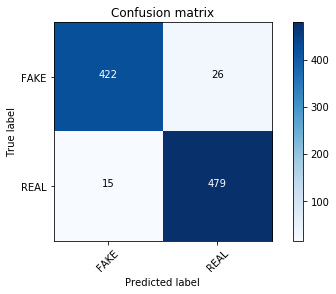

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier

pass_clf = PassiveAggressiveClassifier(max_iter=50 , random_state = 17)
pass_clf.fit(vector_train, y_train)
pred = pass_clf.predict(vector_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


accuracy:   0.972
Confusion matrix, with little normalization


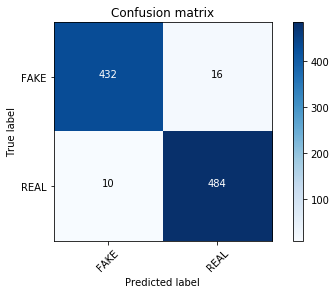

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(n_estimators = 26 , criterion = 'entropy' , random_state = 0)
clf_rand.fit(vector_train, y_train)
pred_rand = clf_rand.predict(vector_test)
score = metrics.accuracy_score(y_test, pred_rand)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_rand, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.966
Confusion matrix, with little normalization


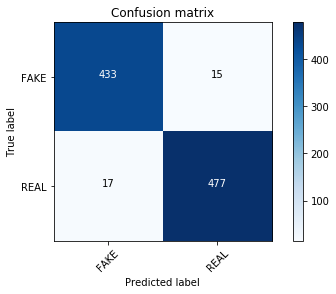

In [58]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(vector_train , y_train)
pred = clf.predict(vector_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [203]:
doc = 'মৃদুল  গাজাসহ'

In [206]:
doc.replace('সহ' , '')

'মৃদুল  গাজা'

In [204]:
doc.rstrip('সহ')

'মৃদুল  গাজা'

In [217]:
doc = ['ইসরায়ে সেন গাল চড় মার ফিলিস্তিন প্রতিবা প্রতীক হ ওঠা কারাগ ছাড়া পেয় আট মাস রোবব কারাগ একসঙ্গ মুক্তি পান আহেদ মা এএফপির খবর তথ্য ১৭ বছর আহেদ মা সকাল ইসরায়েল শ্যারন কারাগ গাড়ি পশ্চিম তীর সীমান্তবর্তী তল্লাশি চৌকি পৌঁ আহে বাড়ি পশ্চিম তীর নবী সালেহ গ্রাম কারাগার মুখপাত্র আসাফ লিবরাতি ইসরায়ে সেনা হস্তান্তর স্বাগত জানা পরিবার সদস্য সমর্থক তল্লাশিচৌকি জড়ো হয় বহনকারী সেনাবাহিনীর গাড়ি দাঁড়ি পশ্চিম তীর যা সেনা মুক্তি পাওয় রাস্ত পাশ জড়ো হ হাজারো জনতা সাংবাদিক উদ্দাশ আহেদ সংবাদ সম্মেলন সেখান কথা আহে বাবা বাসেম এক হাত দি মা হা স্ত্রী রাখ পথ হাঁটছি চারপাশ ‘আম স্বাধীনভাব বাঁচ চাই’ স্লোগান ওঠ ইসরায়ে কর্তৃপক্ষ গণমাধ্যম এড়ি এমনকি মামা তল্লাশি চৌকি দি আনা নি ধরন তথ্য দি প্রথম হ আহেদ মা পশ্চিম তীর ফিলিস্তিনি শহর তুল্করাম শহর কাছ তল্লাশি চৌকি দি আনা তল্লাশি চৌকি দি আনা তিন তিনব পরিবর্তন গত বছর শেষ মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প জেরুজালেম ইসরায়েল রাজধানীর স্বীকৃতি দিল ক্ষোভ ফাট পড় ফিলিস্তিনি মানুষ পবিত্র ভূমি জেরুজালেম রাজধানী হিসাব চা তা ফিলিস্তিনি প্রতিবাদ প্রতিবাদ থামা ইসরায়েল দমনপীড়নসব মিলি সংঘাত দাবানল ছড়ি পড় মধ্যপ্রাচ্য অঞ্চল যুক্তরাষ্ট্র সিদ্ধান্ত দশ ফিলিস্তিনির মান পারেনি কিশোরী আহেদ তামিমি পশ্চিম তীর নবী সালেহ গ্রাম বাড়ির ইসরায়েল সেনা নিজ সংযত পারেনি ক্ষোভ ফাট পড় সামাজিক যোগাযোগমাধ্যম ভাইরাল হ ভিডিও প্রথম মেয়ে ইসরায়ে সেনা যাওয় চিৎক সেনা সর কথাকাটাকা চল পক্ষ একপর্যা এক ইসরায়ে সেন গাল চড় মার কিশোরী আহেদ ত বান্ধবী মোবাইল দৃশ্য ভিডি ভিডিও ভাইরাল হ শিবির আগুন ধরা ফিলিস্তিনি দে সাহস ইসরায়েলি বিভ্রান্ত অপমানিত ক্রুদ্ধ লজ্জিত স্বয়ং ফিলিস্তিনি প্রেসিডেন্ট মাহমুদ আব্বাস কিশোরীর সাহস প্রশংসা সামাজিক যোগাযোগ সমর্থক প্রশংসা ভাসি দে বর্ণবাদী ১৬ বছর এক ফিলিস্তিনি বালিক স্পর্ধা ক্ষুব্ধ তিন ইসরায়ে সেনা চড় খা বিভ্রান্ত পরদিন তিন সেনা দুর্বলতা দেখানো প্রত্যাহ রা আহেদ তামিমি এক চাচা ভাই এন বন্দী কারাগার পর বাড়ি হানা দি তছনছ মেয় পুলিশ স্টেশন মা নারিমান আল তামিমি গ্রেপ্ত তিনজন পাঠানো কারাগার গত মার্চ মুক্তি পা আহে চাচা ভা পশ্চিম তীর সীমান্তবর্তী দেয়াল আহে ছ আঁক কারণ গতকাল শনিব ইসরায়ে কর্তৃপক্ষ ইতালিয়ান এক ফিলিস্তিনি গ্রেপ্ত']
vector_data = vectorizer.transform(doc)
vector_data = vector_data.reshape(vector_data.shape[0] , vector_data.shape[1]*vector_data.shape[2])

now processing doc 1 ::


In [42]:
pass_clf.predict(vector_data)

NameError: name 'vector_data' is not defined

In [41]:
for i in range(10):
    doc = [X_test[i]]
    vec = vectorizer.transform(doc)
    pred = pass_clf.predict(vector_data)
    print(y_test[i] , pred)

merging with word2vec :: vector shape =>  (1, 6033)
processing 0 of 1


NameError: name 'vector_data' is not defined

In [260]:
print(pred)

['FAKE']


In [45]:
doc_arr = X_test[0:20]
vec = vectorizer.transform(doc_arr)
# vec = vector_test[0:20]
# vec = vec.reshape(vec.shape[0] , vec.shape[1]*vec.shape[2])
pred_sample = pass_clf.predict(vec)
print(pred_sample)

merging with word2vec :: vector shape =>  (20, 6033)
processing 0 of 20


ValueError: Found array with dim 3. Estimator expected <= 2.

In [234]:
print(y_test[0:20])

['FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE']


In [237]:
vector_test.shape

(786, 115328)

In [245]:
vec[0]

array([ 0., -0.,  0., ...,  0., -0., -0.])

In [250]:
print(vec[3])

[ 0. -0.  0. ...  0. -0. -0.]


In [43]:
vector_test[3]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [44]:
for i in range(len(vector_test[3])):
    print(vector_test[3][i] , vec[3][i])

IndexError: index 3 is out of bounds for axis 0 with size 1

In [254]:
X_test[3]

'মতিনিউজ টোয়েন্টিফোর ডটকম দীর্ঘ রাজনৈতিক সংগ্রাম ভেতর বাংলাদেশ অভ্যূদয় কার্যত নাকচ বিএনপির মিত্র দল এলডিপির সভাপতি অ আহমদ মুক্তিযুদ্ধ সময় রাজনীতিক বাল ছিড় অবসরপ্রাপ্ত কর্ন অ শুক্রব ‘মুক্তিযুদ্ধ চেতনায় ঐক্যবদ্ধ বাংলাদেশ’ শীর্ষক এক বক্তৃতা অনুষ্ঠান কথা নিজ পাকিস্তান সেনাবাহিনীর বিদ্রোহ ঘোষণাকারী জিয়াউর রহমান ‘মুক্তিযুদ্ধ র\u200d্যাম্বো’ আখ্যায়িত “অর্ধেক বাংলাদাশ জিয়াউর রহমান একা মুক্তিযুদ্ধ একাত্তর সাল বয়স কম পু বাংলাদাশ একা যুদ্ধ মুক্তিযুদ্ধ ১৯৭৫ সাল অনুষ্ঠিত জিয়াউর রহমান একা পু বাংলাদাশ যুদ্ধ পারত জানি ১৯৭৫ সাল একা পু বাংলাদেশ কব্জা করেছিলেন” ১৯৭১ সাল মুজিবনগর অস্থায়ী সরকার বাংলাদেশ মুক্তি সংগ্রাম পরিচালিত হয়েছিলো ত অধীন সশস্ত্র বাহিনীর অংশ ছিলো সেনাবাহিনী অ “অস্থায়ী সরক ছিলো কাগজ কলম পুরো যুদ্ধ রাজনীতিবিদ ভূমিকা ছিলো ঘর বাল ছিড় কারন জিয়াউর রহমান বল উইল মেক মুক্তিযুদ্ধ ডিফিকাল্ট ফর পলিটিশিয়ানস মুক্তিযুদ্ধ জিয়াউর রহমান মিল করে পরবর্তী রাজনীতিক রাজনীতি ঠিকমত বাল ছিড় জিয়াউর রহমান মিল বিএনপি খুল রাজনীতি করি” বাংলাদেশ স্বাধীনত বিরোধিতাকারী জামায়া ইসলামী ‘যুদ্ধাপরাধী দল’ 